In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score



In [2]:
df_h=pd.read_csv("19-hebrews.csv")

In [3]:
df_final1=pd.read_csv("dados_processados.csv")

In [4]:
import pandas as pd

# Suponha que você tenha um DataFrame chamado df e deseja converter a coluna 'coluna_name' para strings
df_final1['text'] = df_final1['text'].astype(str)

In [5]:
df=df_final1

In [6]:
df = df.dropna()
df_final1=df_final1.dropna()

In [7]:
from gensim.models import Word2Vec
import pandas as pd



# Pré-processamento dos textos
preprocessed_texts = [text.split() for text in df["text"]]
# Certifique-se de que seus textos estejam divididos em palavras (tokens)

# Treinamento do modelo Word2Vec
model_word2vec = Word2Vec(sentences=preprocessed_texts, vector_size=100, window=5, min_count=1, sg=0)
# Substitua os parâmetros acima pelos valores que você deseja para seu modelo

# Salvar o modelo treinado (opcional)
model_word2vec.save("seu_modelo_word2vec")

In [124]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Carregue seu conjunto de dados aqui
# Suponha que você tenha um DataFrame chamado df com as colunas "texto" e "rotulo" (0 ou 1)

# Divida o DataFrame em dados de treinamento e teste
dados_treinamento, dados_teste = train_test_split(df, test_size=0.2, random_state=42)

# Pré-processamento dos textos
max_palavras = 10000  # Número máximo de palavras a serem consideradas no vocabulário
max_comprimento_texto = 200  # Tamanho máximo de cada texto
tokenizer = Tokenizer(num_words=max_palavras, oov_token='<OOV>')
tokenizer.fit_on_texts(dados_treinamento["text"])
sequencias_treinamento = tokenizer.texts_to_sequences(dados_treinamento["text"])
sequencias_treinamento_padded = pad_sequences(sequencias_treinamento, maxlen=max_comprimento_texto, padding='post', truncating='post')

# Carregue ou treine seu modelo Word2Vec
# Substitua 'seu_modelo_word2vec' pelo seu próprio modelo Word2Vec
# Certifique-se de que seu modelo tenha os vetores treinados para todas as palavras em seus dados
seu_modelo_word2vec = Word2Vec.load('seu_modelo_word2vec')

# Obtenha os vetores Word2Vec para o vocabulário
embedding_matrix = np.zeros((max_palavras, seu_modelo_word2vec.vector_size))
for word, i in tokenizer.word_index.items():
    if word in seu_modelo_word2vec.wv and i < max_palavras:
        embedding_matrix[i] = seu_modelo_word2vec.wv[word]

# Reduza a dimensionalidade dos vetores Word2Vec com t-SNE
tsne = TSNE(n_components=2, random_state=42)
vetores_tsne = tsne.fit_transform(embedding_matrix)

# Crie o modelo de classificação de texto com embeddings Word2Vec e t-SNE
model = keras.Sequential([
    Embedding(input_dim=max_palavras, output_dim=2, weights=[vetores_tsne], input_length=max_comprimento_texto, trainable=False),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])

# Compile o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treine o modelo com os dados de treinamento
model.fit(sequencias_treinamento_padded, dados_treinamento["label"], epochs=10, validation_split=0.2)

# Avalie o modelo com os dados de teste
sequencias_teste = tokenizer.texts_to_sequences(dados_teste["text"])
sequencias_teste_padded = pad_sequences(sequencias_teste, maxlen=max_comprimento_texto, padding='post', truncating='post')
resultado = model.evaluate(sequencias_teste_padded, dados_teste["label"])
print("Loss:", resultado[0])
print("Acurácia:", resultado[1])


Epoch 1/10
154/154 [==============================] - 11s 55ms/step - loss: 0.5668 - accuracy: 0.7370 - val_loss: 0.5435 - val_accuracy: 0.7453
Epoch 2/10
154/154 [==============================] - 8s 53ms/step - loss: 0.5500 - accuracy: 0.7366 - val_loss: 0.5356 - val_accuracy: 0.7478
Epoch 3/10
154/154 [==============================] - 8s 51ms/step - loss: 0.5457 - accuracy: 0.7386 - val_loss: 0.5350 - val_accuracy: 0.7510
Epoch 4/10
154/154 [==============================] - 8s 53ms/step - loss: 0.5395 - accuracy: 0.7423 - val_loss: 0.5322 - val_accuracy: 0.7494
Epoch 5/10
154/154 [==============================] - 8s 51ms/step - loss: 0.5365 - accuracy: 0.7400 - val_loss: 0.5346 - val_accuracy: 0.7486
Epoch 6/10
154/154 [==============================] - 9s 56ms/step - loss: 0.5318 - accuracy: 0.7454 - val_loss: 0.5405 - val_accuracy: 0.7494
Epoch 7/10
154/154 [==============================] - 9s 57ms/step - loss: 0.5287 - accuracy: 0.7468 - val_loss: 0.5316 - val_accuracy: 0.755

In [128]:
df_h=pd.read_csv("06-romans.csv")

In [129]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Suponha que você tem um DataFrame df_novos_textos com os novos textos a serem classificados
novos_textos = df_h["text"].tolist()

# Pré-processamento dos novos textos
sequencias_novos = tokenizer.texts_to_sequences(novos_textos)
sequencias_novos_padded = pad_sequences(sequencias_novos, maxlen=max_comprimento_texto, padding='post', truncating='post')

# Use o modelo para prever as probabilidades
probabilidades = model.predict(sequencias_novos_padded)

# As probabilidades indicam a probabilidade de os novos textos serem do autor
for i, texto in enumerate(novos_textos):
    probabilidade = probabilidades[i][0]
    print(f"Texto: {texto}")
    print(f"Probabilidade de ser do autor: {probabilidade}")
    print("\n")
media_probabilidades = np.mean(probabilidade)

# Exibe o resultado final
print("Média das probabilidades de ser do autor:", media_probabilidades)

14/14 [==============================] - 0s 18ms/step
Texto: παυλος δουλος ιησου χριστου κλητος αποστολος αφωρισμενος εις ευαγγελιον θεου
Probabilidade de ser do autor: 0.3525247573852539


Texto: ο προεπηγγειλατο δια των προφητων αυτου εν γραφαις αγιαις
Probabilidade de ser do autor: 0.32418325543403625


Texto: περι του υιου αυτου του γενομενου εκ σπερματος δαβιδ κατα σαρκα
Probabilidade de ser do autor: 0.1882249116897583


Texto: του ορισθεντος υιου θεου εν δυναμει κατα πνευμα αγιωσυνης εξ αναστασεως νεκρων ιησου χριστου του κυριου ημων
Probabilidade de ser do autor: 0.3319387137889862


Texto: δι ου ελαβομεν χαριν και αποστολην εις υπακοην πιστεως εν πασιν τοις εθνεσιν υπερ του ονοματος αυτου
Probabilidade de ser do autor: 0.21573668718338013


Texto: εν οις εστε και υμεις κλητοι ιησου χριστου
Probabilidade de ser do autor: 0.29032793641090393


Texto: πασιν τοις ουσιν εν ρωμη αγαπητοις θεου κλητοις αγιοις χαρις υμιν και ειρηνη απο θεου πατρος ημων και κυριου ιησου χριστου
Probabi

In [12]:
df_h

,book,chapter,verse,text
0,hebrews,1,1,πολυμερως και πολυτροπως παλαι ο θεος λαλησας ...
1,hebrews,1,2,επ εσχατων των ημερων τουτων ελαλησεν ημιν εν ...
2,hebrews,1,3,ος ων απαυγασμα της δοξης και χαρακτηρ της υπο...
3,hebrews,1,4,τοσουτω κρειττων γενομενος των αγγελων οσω δια...
4,hebrews,1,5,τινι γαρ ειπεν ποτε των αγγελων υιος μου ει συ...
...,...,...,...,...
298,hebrews,13,21,καταρτισαι υμας εν παντι εργω αγαθω εις το ποι...
299,hebrews,13,22,παρακαλω δε υμας αδελφοι ανεχεσθε του λογου τη...
300,hebrews,13,23,γινωσκετε τον αδελφον τιμοθεον απολελυμενον με...
301,hebrews,13,24,ασπασασθε παντας τους ηγουμενους υμων και παντ...


In [10]:
df_final1

,book,chapter,verse,text,preprocessed_text,label
0,romans,1.0,1.0,παυλος δουλος ιησου χριστου κλητος αποστολος α...,παυλος δουλος ιησου χριστου κλητος αποστολος α...,1
1,romans,1.0,2.0,ο προεπηγγειλατο δια των προφητων αυτου εν γρα...,ο προεπηγγειλατο δια των προφητων αυτου εν γρα...,1
2,romans,1.0,3.0,περι του υιου αυτου του γενομενου εκ σπερματος...,περι του υιου αυτου του γενομενου εκ σπερματος...,1
3,romans,1.0,4.0,του ορισθεντος υιου θεου εν δυναμει κατα πνευμ...,του ορισθεντος υιου θεου εν δυναμει κατα πνευμ...,1
4,romans,1.0,5.0,δι ου ελαβομεν χαριν και αποστολην εις υπακοην...,δι ου ελαβομεν χαριν και αποστολην εις υπακοην...,1
...,...,...,...,...,...,...
7649,jude,1.0,21.0,εαυτους εν αγαπη θεου τηρησατε προσδεχομενοι τ...,εαυτους εν αγαπη θεου τηρησατε προσδεχομενοι τ...,0
7650,jude,1.0,22.0,και ους μεν ελεειτε διακρινομενοι,και ους μεν ελεειτε διακρινομενοι,0
7651,jude,1.0,23.0,ους δε εν φοβω σωζετε εκ του πυρος αρπαζοντες ...,ους δε εν φοβω σωζετε εκ του πυρος αρπαζοντες ...,0
7652,jude,1.0,24.0,τω δε δυναμενω φυλαξαι απταιστους και στησαι κ...,τω δε δυναμενω φυλαξαι απταιστους και στησαι κ...,0


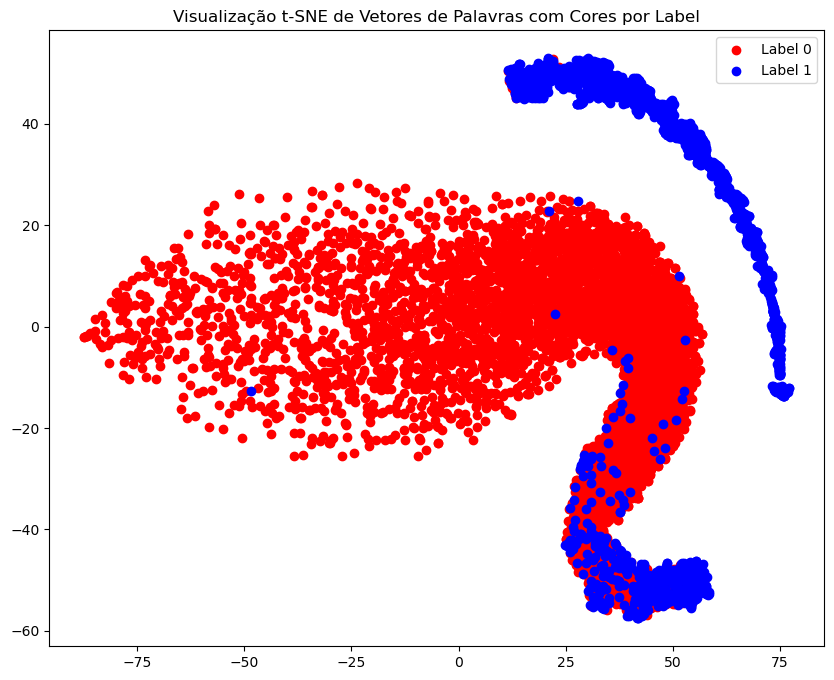

In [8]:
# Suponha que você tenha um DataFrame chamado df_final1 com uma coluna de textos e uma coluna de labels "label"
textos = df_final1["text"].tolist()
labels = df_final1["label"].tolist()

# Pré-processamento dos textos e treinamento do modelo Word2Vec
preprocessed_textos = [texto.split() for texto in textos]  # Dividir textos em tokens
modelo_word2vec = Word2Vec(sentences=preprocessed_textos, vector_size=100, window=5, min_count=1, sg=0)

# Obtenha os vetores de palavras treinados
vetores_palavras = modelo_word2vec.wv

# Reduza a dimensionalidade dos vetores de palavras com t-SNE
tsne = TSNE(n_components=2, random_state=42)
vetores_tsne = tsne.fit_transform(vetores_palavras.vectors)

# Crie um DataFrame com os vetores t-SNE e as palavras correspondentes
df_tsne = pd.DataFrame(vetores_tsne, columns=["Dimensão 1", "Dimensão 2"])
df_tsne["Palavra"] = vetores_palavras.index_to_key

# Corrija o tamanho do DataFrame para coincidir com o tamanho das listas
df_tsne = df_tsne.iloc[:len(labels)]
df_tsne["Label"] = labels  # Adicione as labels ao DataFrame

# Divida o DataFrame com base nas labels
df_label_0 = df_tsne[df_tsne["Label"] == 0]
df_label_1 = df_tsne[df_tsne["Label"] == 1]

# Plote os pontos em um gráfico 2D com cores diferentes
plt.figure(figsize=(10, 8))
plt.scatter(df_label_0["Dimensão 1"], df_label_0["Dimensão 2"], label="Label 0", c="red")
plt.scatter(df_label_1["Dimensão 1"], df_label_1["Dimensão 2"], label="Label 1", c="blue")
plt.title("Visualização t-SNE de Vetores de Palavras com Cores por Label")
plt.legend()
plt.show()

In [30]:
df_final1["label"].value_counts()


0    5621
1    2032
Name: label, dtype: int64

In [31]:
df_h["label"]=2

In [32]:
# Concatenar os DataFrames ao longo das linhas (eixo 0)
result = pd.concat([df_final1, df_h], axis=0)

# Se você deseja redefinir o índice após a concatenação
result = result.reset_index(drop=True)

# Agora, 'result' contém a concatenação de 'df1' e 'df_h'

In [33]:
result["label"].value_counts()


0    5621
1    2032
2     303
Name: label, dtype: int64

In [23]:
palavra_especifica = "hebrews"

# Verificar se a palavra específica está na coluna "texto" e atribuir valor 2 na nova coluna "Label"
result['label'] = result['book'].apply(lambda x: 2 if palavra_especifica in x else 0)

In [34]:
result

,book,chapter,verse,text,preprocessed_text,label
0,romans,1.0,1.0,παυλος δουλος ιησου χριστου κλητος αποστολος α...,παυλος δουλος ιησου χριστου κλητος αποστολος α...,1
1,romans,1.0,2.0,ο προεπηγγειλατο δια των προφητων αυτου εν γρα...,ο προεπηγγειλατο δια των προφητων αυτου εν γρα...,1
2,romans,1.0,3.0,περι του υιου αυτου του γενομενου εκ σπερματος...,περι του υιου αυτου του γενομενου εκ σπερματος...,1
3,romans,1.0,4.0,του ορισθεντος υιου θεου εν δυναμει κατα πνευμ...,του ορισθεντος υιου θεου εν δυναμει κατα πνευμ...,1
4,romans,1.0,5.0,δι ου ελαβομεν χαριν και αποστολην εις υπακοην...,δι ου ελαβομεν χαριν και αποστολην εις υπακοην...,1
...,...,...,...,...,...,...
7951,hebrews,13.0,21.0,καταρτισαι υμας εν παντι εργω αγαθω εις το ποι...,NaN,2
7952,hebrews,13.0,22.0,παρακαλω δε υμας αδελφοι ανεχεσθε του λογου τη...,NaN,2
7953,hebrews,13.0,23.0,γινωσκετε τον αδελφον τιμοθεον απολελυμενον με...,NaN,2
7954,hebrews,13.0,24.0,ασπασασθε παντας τους ηγουμενους υμων και παντ...,NaN,2


In [16]:
from sklearn.cluster import AgglomerativeClustering
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Suponhamos que você tem um DataFrame df_final1 com uma coluna de textos e uma coluna de labels "label"
textos = df_final1["text"].tolist()
labels = df_final1["label"].tolist()

# Pré-processamento dos textos e treinamento do modelo Word2Vec
preprocessed_textos = [texto.split() for texto in textos]  # Dividir textos em tokens
modelo_word2vec = Word2Vec(sentences=preprocessed_textos, vector_size=100, window=5, min_count=1, sg=0)

# Obtenha os vetores de palavras treinados
vetores_palavras = modelo_word2vec.wv

# Aplicar Agglomerative Clustering aos vetores de palavras
num_clusters = 3  # Defina o número de clusters desejado
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
clusters = agglomerative.fit_predict(vetores_palavras.vectors)

# Crie um DataFrame com os vetores de palavras, as palavras correspondentes e os clusters
df_agglomerative = pd.DataFrame(vetores_palavras.vectors, columns=[f"Dimensão {i+1}" for i in range(100)])
df_agglomerative["Palavra"] = vetores_palavras.index_to_key
df_agglomerative["Cluster"] = clusters

# Reduza a dimensionalidade dos vetores de palavras com t-SNE para visualização dos clusters
tsne = TSNE(n_components=2, random_state=42)
vetores_tsne = tsne.fit_transform(df_agglomerative.iloc[:, :-2])  # Exclua as colunas de Palavra e Cluster

# Cálculo das métricas de avaliação de cluster
silhouette = silhouette_score(vetores_tsne, clusters)
davies_bouldin = davies_bouldin_score(vetores_tsne, clusters)
calinski_harabasz = calinski_harabasz_score(vetores_tsne, clusters)

print(f"Coeficiente de Silhueta: {silhouette}")
print(f"Índice de Davies-Bouldin: {davies_bouldin}")
print(f"Índice Calinski-Harabasz: {calinski_harabasz}")

Coeficiente de Silhueta: 0.2607446610927582
Índice de Davies-Bouldin: 0.532949117493339
Índice Calinski-Harabasz: 1025.7678589823483


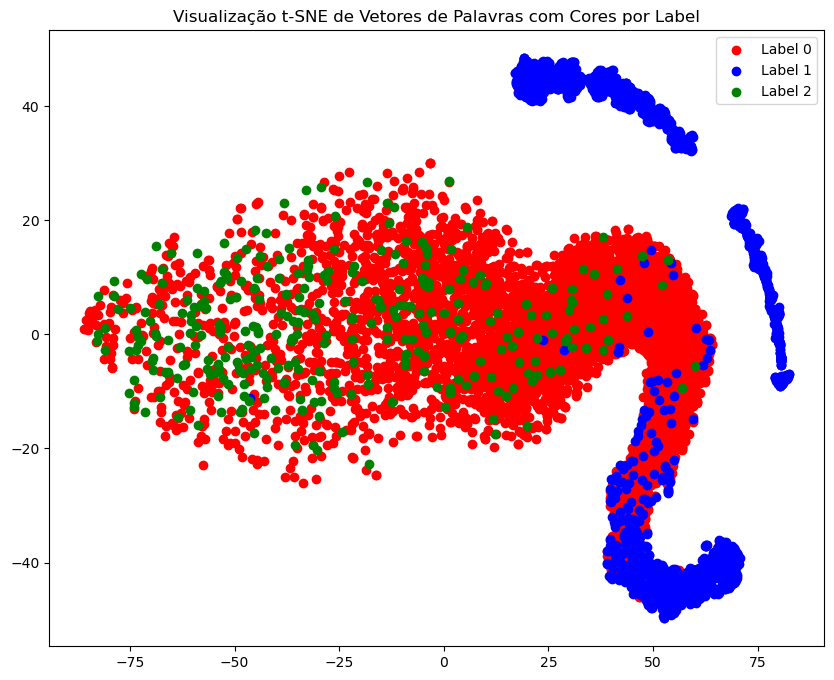

In [18]:
# Suponha que você tenha um DataFrame chamado df_final1 com uma coluna de textos e uma coluna de labels "label"
textos = result["text"].tolist()
labels = result["label"].tolist()

# Pré-processamento dos textos e treinamento do modelo Word2Vec
preprocessed_textos = [texto.split() for texto in textos]  # Dividir textos em tokens
modelo_word2vec = Word2Vec(sentences=preprocessed_textos, vector_size=100, window=5, min_count=1, sg=0)

# Obtenha os vetores de palavras treinados
vetores_palavras = modelo_word2vec.wv

# Reduza a dimensionalidade dos vetores de palavras com t-SNE
tsne = TSNE(n_components=2, random_state=42)
vetores_tsne = tsne.fit_transform(vetores_palavras.vectors)

# Crie um DataFrame com os vetores t-SNE e as palavras correspondentes
df_tsne = pd.DataFrame(vetores_tsne, columns=["Dimensão 1", "Dimensão 2"])
df_tsne["Palavra"] = vetores_palavras.index_to_key

# Corrija o tamanho do DataFrame para coincidir com o tamanho das listas
df_tsne = df_tsne.iloc[:len(labels)]
df_tsne["Label"] = labels  # Adicione as labels ao DataFrame

# Divida o DataFrame com base nas labels
df_label_0 = df_tsne[df_tsne["Label"] == 0]
df_label_1 = df_tsne[df_tsne["Label"] == 1]
df_label_2 = df_tsne[df_tsne["Label"] == 2]

# Plote os pontos em um gráfico 2D com cores diferentes
# Plote os pontos em um gráfico 2D com cores diferentes
plt.figure(figsize=(10, 8))
plt.scatter(df_label_0["Dimensão 1"], df_label_0["Dimensão 2"], label="Label 0", c="red")
plt.scatter(df_label_1["Dimensão 1"], df_label_1["Dimensão 2"], label="Label 1", c="blue")
plt.title("Visualização t-SNE de Vetores de Palavras com Cores por Label")

# Plot da Label 2 (verde) por cima
plt.scatter(df_label_2["Dimensão 1"], df_label_2["Dimensão 2"], label="Label 2", c="green")

plt.legend()
plt.show()

Coeficiente de Silhueta: 0.8731928467750549
Índice de Davies-Bouldin: 0.49662743241826535
Índice Calinski-Harabasz: 43828.86501382322


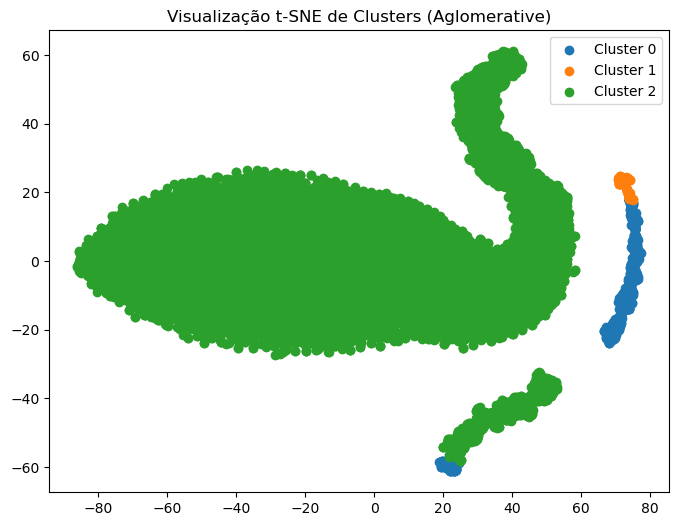

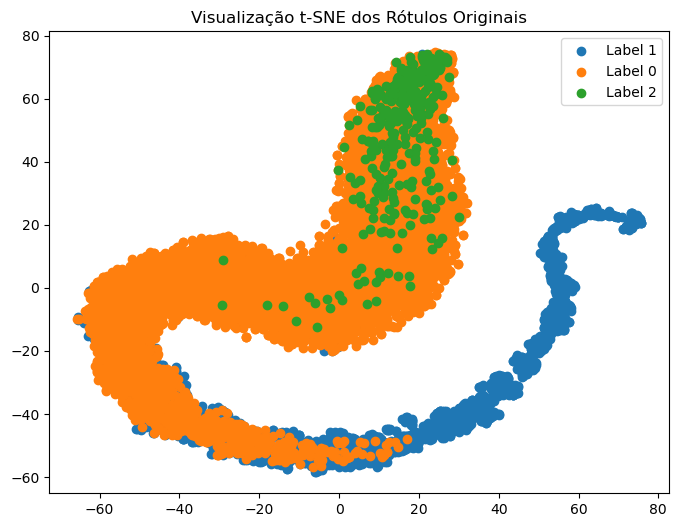

In [35]:
from sklearn.cluster import AgglomerativeClustering
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Suponhamos que você tem um DataFrame df_final1 com uma coluna de textos e uma coluna de labels "label"
textos = result["text"].tolist()
labels = result["label"].tolist()

# Pré-processamento dos textos e treinamento do modelo Word2Vec
preprocessed_textos = [texto.split() for texto in textos]  # Dividir textos em tokens
modelo_word2vec = Word2Vec(sentences=preprocessed_textos, vector_size=100, window=5, min_count=1, sg=0)

# Obtenha os vetores de palavras treinados
vetores_palavras = modelo_word2vec.wv

# Aplicar Agglomerative Clustering aos vetores de palavras
num_clusters = 3  # Defina o número de clusters desejado
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
clusters = agglomerative.fit_predict(vetores_palavras.vectors)

# Calcular métricas de avaliação de clustering
silhouette = silhouette_score(vetores_palavras.vectors, clusters)
davies_bouldin = davies_bouldin_score(vetores_palavras.vectors, clusters)
calinski_harabasz = calinski_harabasz_score(vetores_palavras.vectors, clusters)

print(f"Coeficiente de Silhueta: {silhouette}")
print(f"Índice de Davies-Bouldin: {davies_bouldin}")
print(f"Índice Calinski-Harabasz: {calinski_harabasz}")

# Reduzir a dimensionalidade dos vetores de palavras com t-SNE
tsne = TSNE(n_components=2, random_state=42)
vetores_tsne = tsne.fit_transform(vetores_palavras.vectors)

# Criar um DataFrame com os vetores t-SNE e os clusters correspondentes
df_tsne = pd.DataFrame(vetores_tsne, columns=["Dimensão 1", "Dimensão 2"])
df_tsne["Cluster"] = clusters

# Plotar os pontos em um gráfico 2D com cores diferentes representando clusters
plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    df_cluster = df_tsne[df_tsne["Cluster"] == cluster_label]
    plt.scatter(df_cluster["Dimensão 1"], df_cluster["Dimensão 2"], label=f"Cluster {cluster_label}")

plt.title("Visualização t-SNE de Clusters (Aglomerative)")
plt.legend()
plt.show()

# Reduzir a dimensionalidade dos vetores de palavras (rótulos) com t-SNE
tsne_labels = TSNE(n_components=2, random_state=42)
vetores_tsne_labels = tsne_labels.fit_transform(vetores_palavras.vectors[:len(labels)])  # Use apenas a quantidade correspondente aos rótulos

# Criar um DataFrame com os vetores t-SNE dos rótulos
df_tsne_labels = pd.DataFrame(vetores_tsne_labels, columns=["Dimensão 1", "Dimensão 2"])
df_tsne_labels["Label"] = labels

# Plotar os pontos de rótulos em um gráfico 2D com t-SNE
unique_labels = df_tsne_labels["Label"].unique()
plt.figure(figsize=(8, 6))
for label in unique_labels:
    df_label = df_tsne_labels[df_tsne_labels["Label"] == label]
    plt.scatter(df_label["Dimensão 1"], df_label["Dimensão 2"], label=f"Label {label}")

plt.title("Visualização t-SNE dos Rótulos Originais")
plt.legend()
plt.show()

In [27]:
df_tsne_labels["Label"].value_counts()


0    7653
2     303
Name: Label, dtype: int64

c:\Users\anton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Coeficiente de Silhueta: 0.8804653286933899
Índice de Davies-Bouldin: 0.48137506910866773
Índice Calinski-Harabasz: 48254.06933097266


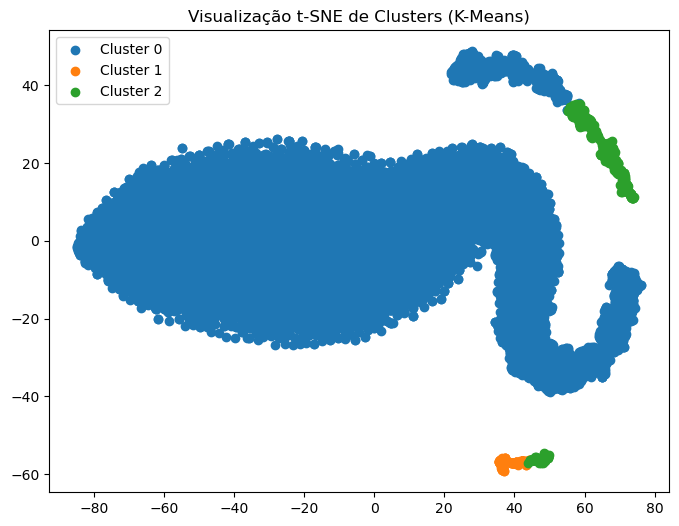

In [36]:
from sklearn.cluster import KMeans

# Suponhamos que você tem um DataFrame df_final1 com uma coluna de textos e uma coluna de labels "label"
textos = result["text"].tolist()
labels = result["label"].tolist()

# Pré-processamento dos textos e treinamento do modelo Word2Vec
preprocessed_textos = [texto.split() for texto in textos]  # Dividir textos em tokens
modelo_word2vec = Word2Vec(sentences=preprocessed_textos, vector_size=100, window=5, min_count=1, sg=0)

# Obtenha os vetores de palavras treinados
vetores_palavras = modelo_word2vec.wv

# Aplicar K-Means aos vetores de palavras
num_clusters = 3  # Defina o número de clusters desejado
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(vetores_palavras.vectors)

# Calcular métricas de avaliação de clustering
silhouette = silhouette_score(vetores_palavras.vectors, clusters)
davies_bouldin = davies_bouldin_score(vetores_palavras.vectors, clusters)
calinski_harabasz = calinski_harabasz_score(vetores_palavras.vectors, clusters)

print(f"Coeficiente de Silhueta: {silhouette}")
print(f"Índice de Davies-Bouldin: {davies_bouldin}")
print(f"Índice Calinski-Harabasz: {calinski_harabasz}")

# Reduzir a dimensionalidade dos vetores de palavras com t-SNE
tsne = TSNE(n_components=2, random_state=42)
vetores_tsne = tsne.fit_transform(vetores_palavras.vectors)

# Criar um DataFrame com os vetores t-SNE e os clusters correspondentes
df_tsne = pd.DataFrame(vetores_tsne, columns=["Dimensão 1", "Dimensão 2"])
df_tsne["Cluster"] = clusters

# Plotar os pontos em um gráfico 2D com cores diferentes representando clusters
plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    df_cluster = df_tsne[df_tsne["Cluster"] == cluster_label]
    plt.scatter(df_cluster["Dimensão 1"], df_cluster["Dimensão 2"], label=f"Cluster {cluster_label}")

plt.title("Visualização t-SNE de Clusters (K-Means)")
plt.legend()
plt.show()

Coeficiente de Silhueta (DBSCAN): 0.9444686770439148
Índice de Davies-Bouldin (DBSCAN): 4.500621788289185
Índice Calinski-Harabasz (DBSCAN): 7374.141099265883


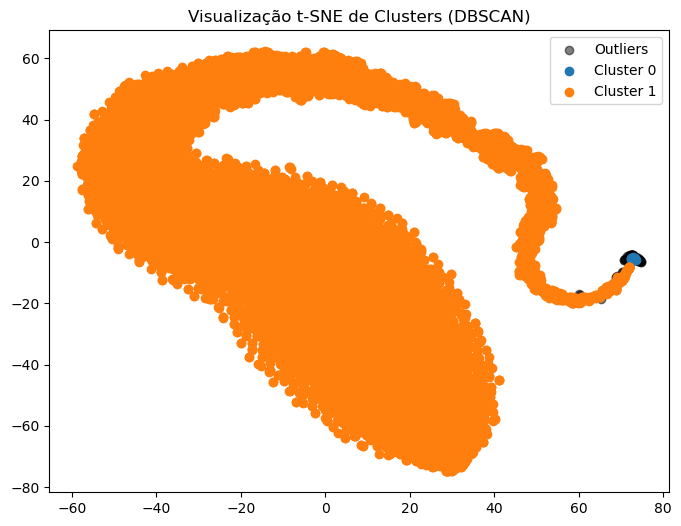

In [37]:
from sklearn.cluster import DBSCAN
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Suponhamos que você tem um DataFrame df_final1 com uma coluna de textos e uma coluna de labels "label"
textos = df_final1["text"].tolist()
labels = df_final1["label"].tolist()

# Pré-processamento dos textos e treinamento do modelo Word2Vec
preprocessed_textos = [texto.split() for texto in textos]  # Dividir textos em tokens
modelo_word2vec = Word2Vec(sentences=preprocessed_textos, vector_size=100, window=5, min_count=1, sg=0)

# Obtenha os vetores de palavras treinados
vetores_palavras = modelo_word2vec.wv

# Aplicar DBSCAN aos vetores de palavras
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajuste os parâmetros eps e min_samples conforme necessário
clusters_dbscan = dbscan.fit_predict(vetores_palavras.vectors)

# Calcular métricas de avaliação de clustering para DBSCAN
silhouette_dbscan = silhouette_score(vetores_palavras.vectors, clusters_dbscan)
davies_bouldin_dbscan = davies_bouldin_score(vetores_palavras.vectors, clusters_dbscan)
calinski_harabasz_dbscan = calinski_harabasz_score(vetores_palavras.vectors, clusters_dbscan)

print(f"Coeficiente de Silhueta (DBSCAN): {silhouette_dbscan}")
print(f"Índice de Davies-Bouldin (DBSCAN): {davies_bouldin_dbscan}")
print(f"Índice Calinski-Harabasz (DBSCAN): {calinski_harabasz_dbscan}")

# Reduzir a dimensionalidade dos vetores de palavras com t-SNE para os clusters do DBSCAN
tsne_dbscan = TSNE(n_components=2, random_state=42)
vetores_tsne_dbscan = tsne_dbscan.fit_transform(vetores_palavras.vectors)

# Criar um DataFrame com os vetores t-SNE do DBSCAN
df_tsne_dbscan = pd.DataFrame(vetores_tsne_dbscan, columns=["Dimensão 1", "Dimensão 2"])
df_tsne_dbscan["Cluster"] = clusters_dbscan

# Plotar os pontos em um gráfico 2D com cores diferentes representando clusters do DBSCAN
unique_clusters_dbscan = df_tsne_dbscan["Cluster"].unique()
plt.figure(figsize=(8, 6))
for cluster_label in unique_clusters_dbscan:
    if cluster_label == -1:
        df_cluster = df_tsne_dbscan[df_tsne_dbscan["Cluster"] == cluster_label]
        plt.scatter(df_cluster["Dimensão 1"], df_cluster["Dimensão 2"], label=f"Outliers", c="black", alpha=0.5)
    else:
        df_cluster = df_tsne_dbscan[df_tsne_dbscan["Cluster"] == cluster_label]
        plt.scatter(df_cluster["Dimensão 1"], df_cluster["Dimensão 2"], label=f"Cluster {cluster_label}")

plt.title("Visualização t-SNE de Clusters (DBSCAN)")
plt.legend()
plt.show()

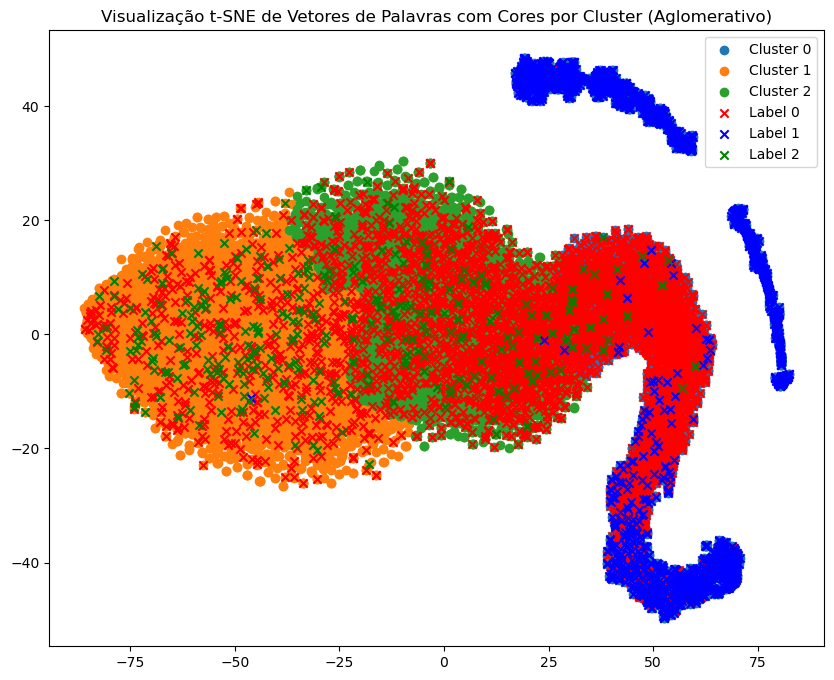

Coeficiente de Silhueta: 0.42134666442871094
Índice de Davies-Bouldin: 0.8220664444822018
Índice Calinski-Harabasz: 25906.95196365734


In [21]:
from sklearn.cluster import AgglomerativeClustering

# Use o algoritmo de clustering aglomerativo
num_clusters = 3  # Defina o número de clusters desejado
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
clusters = agglomerative.fit_predict(vetores_tsne)

# Crie um DataFrame para os clusters do algoritmo aglomerativo
df_agglomerative = pd.DataFrame(vetores_tsne, columns=["Dimensão 1", "Dimensão 2"])
df_agglomerative["Cluster"] = clusters

# Plote os clusters em um gráfico 2D com cores diferentes
plt.figure(figsize=(10, 8))

for cluster_label in range(num_clusters):
    df_cluster = df_agglomerative[df_agglomerative["Cluster"] == cluster_label]
    plt.scatter(df_cluster["Dimensão 1"], df_cluster["Dimensão 2"], label=f"Cluster {cluster_label}")

# Adicione os pontos das labels sobre os clusters
plt.scatter(df_label_0["Dimensão 1"], df_label_0["Dimensão 2"], label="Label 0", c="red", marker='x')
plt.scatter(df_label_1["Dimensão 1"], df_label_1["Dimensão 2"], label="Label 1", c="blue", marker='x')
plt.scatter(df_label_2["Dimensão 1"], df_label_2["Dimensão 2"], label="Label 2", c="green", marker='x')

plt.title("Visualização t-SNE de Vetores de Palavras com Cores por Cluster (Aglomerativo)")
plt.legend()
plt.show()
silhouette = silhouette_score(vetores_tsne, clusters)
davies_bouldin = davies_bouldin_score(vetores_tsne, clusters)
calinski_harabasz = calinski_harabasz_score(vetores_tsne, clusters)

print(f"Coeficiente de Silhueta: {silhouette}")
print(f"Índice de Davies-Bouldin: {davies_bouldin}")
print(f"Índice Calinski-Harabasz: {calinski_harabasz}")

In [13]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# Suponha que você tenha um DataFrame chamado df_final1 com uma coluna de textos e uma coluna de labels "label"
textos = result["text"].tolist()
labels = result["label"].tolist()

# Pré-processamento dos textos e treinamento do modelo Word2Vec
preprocessed_textos = [texto.split() for texto in textos]  # Dividir textos em tokens
modelo_word2vec = Word2Vec(sentences=preprocessed_textos, vector_size=100, window=5, min_count=1, sg=0)

# Obtenha os vetores de palavras treinados
vetores_palavras = modelo_word2vec.wv

# Reduza a dimensionalidade dos vetores de palavras com t-SNE
tsne = TSNE(n_components=3, random_state=42)
vetores_tsne = tsne.fit_transform(vetores_palavras.vectors)

# Crie um DataFrame com os vetores t-SNE e as palavras correspondentes
df_tsne = pd.DataFrame(vetores_tsne, columns=["Dimensão 1", "Dimensão 2","Dimensão 3"])
df_tsne["Palavra"] = vetores_palavras.index_to_key

# Corrija o tamanho do DataFrame para coincidir com o tamanho das listas
df_tsne = df_tsne.iloc[:len(labels)]
df_tsne["Label"] = labels  # Adicione as labels ao DataFrame

# Divida o DataFrame com base nas labels
df_label_0 = df_tsne[df_tsne["Label"] == 0]
df_label_1 = df_tsne[df_tsne["Label"] == 1]
df_label_2 = df_tsne[df_tsne["Label"] == 2]

# Plote os pontos em um gráfico 2D com cores diferentes
# Plote os pontos em um gráfico 2D com cores diferentes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plote os pontos em um gráfico 3D com cores diferentes
ax.scatter(df_label_0["Dimensão 1"], df_label_0["Dimensão 2"], df_label_0["Dimensão 3"], label="Label 0", c="red")
ax.scatter(df_label_1["Dimensão 1"], df_label_1["Dimensão 2"], df_label_1["Dimensão 3"], label="Label 1", c="blue")
ax.scatter(df_label_2["Dimensão 1"], df_label_2["Dimensão 2"], df_label_2["Dimensão 3"], label="Label 2", c="green")

plt.title("Visualização t-SNE de Vetores de Palavras em 3 Dimensões com Cores por Label")
plt.legend()
plt.show()

KeyboardInterrupt: 

In [72]:
df2=pd.read_csv("23-john-1.csv")

In [15]:
import pandas as pd
import plotly.express as px

# Suponha que você tenha um DataFrame chamado df_final1 com uma coluna de textos e uma coluna de labels "label"
textos = result["text"].tolist()
labels = result["label"].tolist()

# Pré-processamento dos textos e treinamento do modelo Word2Vec
preprocessed_textos = [texto.split() for texto in textos]  # Dividir textos em tokens
modelo_word2vec = Word2Vec(sentences=preprocessed_textos, vector_size=100, window=5, min_count=1, sg=0)

# Obtenha os vetores de palavras treinados
vetores_palavras = modelo_word2vec.wv

# Reduza a dimensionalidade dos vetores de palavras com t-SNE
tsne = TSNE(n_components=3, random_state=42)
vetores_tsne = tsne.fit_transform(vetores_palavras.vectors)

# Crie um DataFrame com os vetores t-SNE e as palavras correspondentes
df_tsne = pd.DataFrame(vetores_tsne, columns=["Dimensão 1", "Dimensão 2", "Dimensão 3"])
df_tsne["Palavra"] = vetores_palavras.index_to_key

# Corrija o tamanho do DataFrame para coincidir com o tamanho das listas
df_tsne = df_tsne.iloc[:len(labels)]
df_tsne["Label"] = labels  # Adicione as labels ao DataFrame

# Crie um gráfico 3D interativo com Plotly
fig = px.scatter_3d(df_tsne, x="Dimensão 1", y="Dimensão 2", z="Dimensão 3", color="Label", title="Visualização t-SNE de Vetores de Palavras em 3 Dimensões com Cores por Label")
fig.show()